In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import signal
from scipy import interpolate
from scipy import signal
import scipy.fft as f

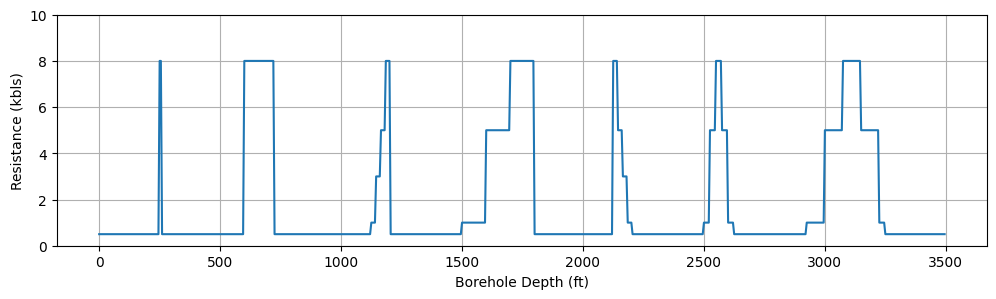

In [3]:
dz = 5
n_inc = 700

depth_profile_syn = np.arange(0,dz*n_inc,dz)
borehole_qual_syn = np.ones_like(depth_profile_syn)*.5
borehole_qual_syn[50:52] = 8

borehole_qual_syn[120:145] = 8

borehole_qual_syn[225:229] = 1
borehole_qual_syn[229:233] = 3
borehole_qual_syn[233:237] = 5
borehole_qual_syn[237:241] = 8

borehole_qual_syn[300:320] = 1
borehole_qual_syn[320:340] = 5
borehole_qual_syn[340:360] = 8

borehole_qual_syn[425:429] = 8
borehole_qual_syn[429:433] = 5
borehole_qual_syn[433:437] = 3
borehole_qual_syn[437:441] = 1

borehole_qual_syn[500:505] = 1
borehole_qual_syn[505:510] = 5
borehole_qual_syn[510:515] = 8
borehole_qual_syn[515:520] = 5
borehole_qual_syn[520:525] = 1

borehole_qual_syn[585:600] = 1
borehole_qual_syn[600:615] = 5
borehole_qual_syn[615:630] = 8
borehole_qual_syn[630:645] = 5
borehole_qual_syn[645:650] = 1

plt.plot(depth_profile_syn,borehole_qual_syn)
plt.ylabel('Resistance (kbls)')
plt.xlabel('Borehole Depth (ft)')
plt.grid(), plt.ylim([0,10])
plt.gcf().set_size_inches(12,3)
plt.show()

56


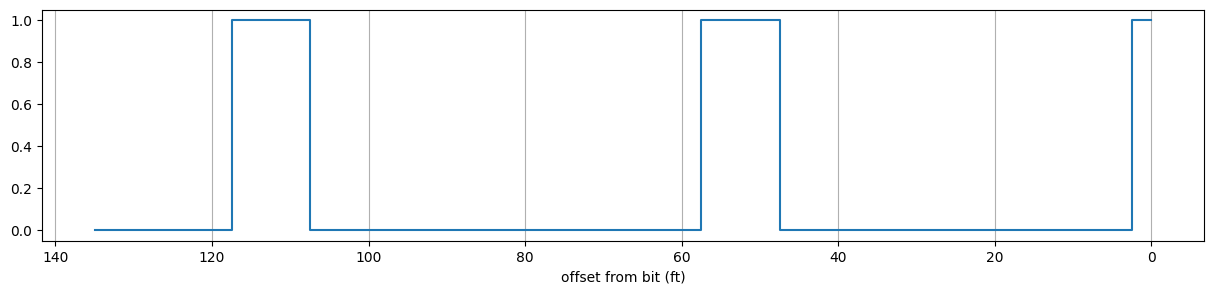

In [4]:
bha_length = 140
x = np.arange(bha_length*2, step=dz)
BHA_stab_flag = np.zeros(int(bha_length*2/dz))
BHA_stab_flag_dirac = BHA_stab_flag.copy()
bit = [0,1]
bit_ind = int(len(BHA_stab_flag)/2 + bit[1]//dz)

# stab1 = [57.69,65.39] # BHA4
stab1 = [62.74-7.8, 62.74] # BHA10
stab1_ind = [int(len(BHA_stab_flag)/2+stab1[0]//dz),int(len(BHA_stab_flag)/2+stab1[1]//dz)]

# stab2 = [113.81,120.8] # BHA4
stab2 = [120.23-8.88, 120.23] # BHA10
print(len(BHA_stab_flag))
stab2_ind = [int(len(BHA_stab_flag)/2+stab2[0]//dz),int(len(BHA_stab_flag)/2+stab2[1]//dz)]

BHA_stab_flag[bit_ind] = 1
BHA_stab_flag[stab1_ind[0]:stab1_ind[1]] = 1
BHA_stab_flag[stab2_ind[0]:stab2_ind[1]] = 1

# dirac bha
BHA_stab_flag_dirac[bit_ind]=1
BHA_stab_flag_dirac[stab1_ind[1]]=1
BHA_stab_flag_dirac[stab2_ind[1]]=1

# wavelet
widths = np.arange(1, 5)
M = 100
s = 4.0
w = 2.0
wavelet = signal.morlet2
# wavelet = signal.ricker

BHA_stab_flag_dirac_wavelet = signal.cwt(BHA_stab_flag_dirac, wavelet, widths,w=0.6)
BHA_flag_trim = BHA_stab_flag[:int(bha_length/dz+1)]

plt.step(x[:int(bha_length/dz)], BHA_stab_flag[int(bha_length/dz):],where='mid')
# plt.plot(x, BHA_stab_flag, 'o', color='grey', alpha=0.3)
# plt.step(x[:int(bha_length/dz)], BHA_stab_flag[int(bha_length/dz):],where='post',label='BHA Impulse')
# plt.step(x, BHA_stab_flag,where='mid')
# plt.step(x[:int(bha_length/dz)], BHA_stab_flag_dirac[int(bha_length/dz):],'--k', where='mid')
# plt.plot(x[:int(bha_length/dz)], BHA_stab_flag_dirac[int(bha_length/dz):], 'o', color='grey', alpha=0.3)
# plt.step(x, BHA_stab_flag_dirac,'--k', where='mid')
# plt.plot(x, BHA_stab_flag_dirac, 'o', color='grey', alpha=0.3)
# plt.plot(x,BHA_stab_flag_dirac_wavelet[0,:], 'r')
plt.gcf().set_size_inches(15,3)
plt.xlabel('offset from bit (ft)')
plt.gca().invert_xaxis()
# plt.xlim(135,145)
plt.grid(axis='x')
plt.show()

# BHA_stab_flag[0] = 1
# BHA_stab_flag

[5.         3.00343701 0.53337057 1.17301313 3.20872201 4.73613457
 2.45238996 1.         1.80193774 2.94944625 4.00899999 1.77825269
 1.68557598 2.04491175 2.23606798 2.99838196 1.2469796  2.00351583
 1.84656349 1.21716071 1.96543549 1.         1.82086032 1.34306285
 0.44504187 1.21323744 0.95073099 1.16950528 1.         1.16950528
 0.95073099 1.21323744 0.44504187 1.34306285 1.82086032 1.
 1.96543549 1.21716071 1.84656349 2.00351583 1.2469796  2.99838196
 2.23606798 2.04491175 1.68557598 1.77825269 4.00899999 2.94944625
 1.80193774 1.         2.45238996 4.73613457 3.20872201 1.17301313
 0.53337057 3.00343701]


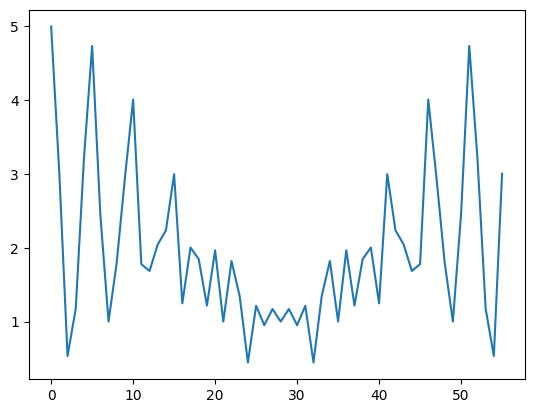

In [5]:
FFT_BHA_STAB = np.fft.fft(BHA_stab_flag)
# FFT_BHA_STAB = np.abs(FFT_BHA_STAB) / np.abs(FFT_BHA_STAB).max()
fs = 1/dz/2
freqs = np.fft.fftfreq(len(FFT_BHA_STAB), d=1/fs)
plt.plot(np.abs(FFT_BHA_STAB))
print(np.abs(FFT_BHA_STAB))

In [6]:
# syn1 = signal.convolve(BHA_stab_flag,borehole_qual_syn,'full')
# Here we don't have to do full, I guess just same is OK.
syn1 = signal.convolve(borehole_qual_syn,BHA_stab_flag,mode='same')

print("SYN:" , borehole_qual_syn.shape)
print("This is signal : " ,syn1.shape)
print ("BHA:" ,BHA_stab_flag.shape)

SYN: (700,)
This is signal :  (700,)
BHA: (56,)


In [7]:
# Let's use another filter to smooth the data. 
from scipy.signal import savgol_filter

(700,)


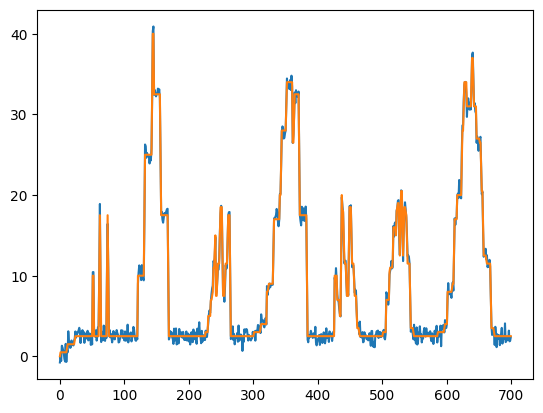

In [8]:
window = 1200
# Adding noise 
noise = np.random.normal(0, 0.6, syn1.shape)
syn1_noise = syn1
syn1_noise_filter = savgol_filter(syn1_noise,window_length=5,polyorder=3,mode='interp')
# raw_noise = np.mean(abs(syn1)) * np.random.randn(len(syn1))
# raw_noise = np.mean(abs(syn1)) * + (0.5 * np.random.random(len(syn1)))
raw_noise = noise
syn1_noise_filter = syn1 + raw_noise
# syn1_noise_filter = pd.Series(syn1_noise).rolling(window=5,center=True).median()
# syn1_filter = pd.Series(syn1).rolling(window=5,center=True).median()
plt.plot(syn1_noise_filter)
plt.plot(syn1)
print(syn1_noise_filter.shape)

In [9]:
import scipy.linalg
# syn3 noise = LS0 deconv(syn1 noise filter, BHA stab flag,1e-2,0.05)
def LSQ_deconv(sig, w, stab=1e-6 , Cnum = 0.2):
    A = scipy.linalg.convolution_matrix(w, len(sig), 'same')
    Cnum_temp = np.linalg.cond(np.matmul(A.transpose(),A))
    if Cnum_temp >=1e+9:
        print("Condition number :" , Cnum_temp)
        print("Condition number is too large so that a very samll errror can aslo get amplified!")
        A += stab*np.std(w) * np.diag(np.ones(A.shape[1]))
        recovered, _, _, _ = scipy.linalg.lstsq(A, sig,cond=Cnum)
    else: 
        recovered, _, _, _ = scipy.linalg.lstsq(A, sig)

    return recovered

In [10]:
# Wiener does not work
# from scipy.linalg import toeplitz
# from scipy.linalg import inv
# def Wiener_deconv(sig, w, stab=1e-6):
#     nf = len(w)
#     phi = toeplitz(sig)
#     phi += stab*np.max(sig) * np.diag(np.ones(phi.shape[1]))
#     tar = np.zeros((len(sig),1))
#     tar[0] = 1
#     tar[1] = 1
#     filt = np.matmul(inv(phi),tar)
#     filt = filt.reshape(-1)
#     recovered = signal.convolve(sig,filt,mode='same')
#     return recovered

Condition number : inf
Condition number is too large so that a very samll errror can aslo get amplified!


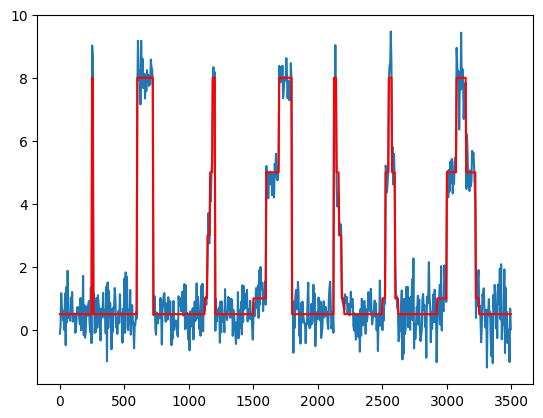

In [11]:
a = np.array(syn1_noise_filter)
a= a[~np.isnan(a)]
# syn3_noise, remainder= signal.deconvolve(syn1_noise_filter,BHA_stab_flag)
syn3_noise = LSQ_deconv(syn1_noise_filter,BHA_stab_flag,1e-1,0.05)
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 
plt.plot(depth_profile_syn,syn3_noise)
plt.plot(depth_profile_syn,borehole_qual_syn,"r")

Test cases for nosie threshold 

0.7 std

(700,)


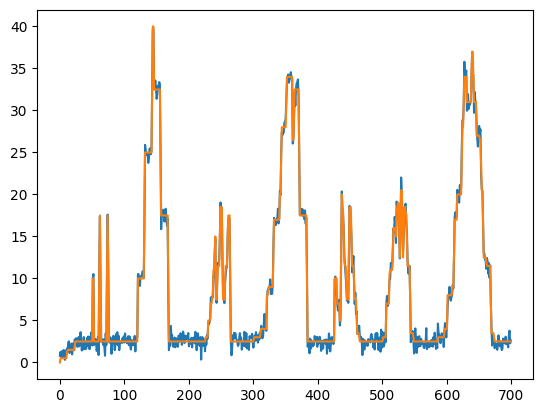

In [12]:
window = 1200
# Adding noise 
noise = np.random.normal(0, 0.7, syn1.shape)
syn1_noise = syn1
syn1_noise_filter = savgol_filter(syn1_noise,window_length=5,polyorder=3,mode='interp')
# raw_noise = np.mean(abs(syn1)) * np.random.randn(len(syn1))
# raw_noise = np.mean(abs(syn1)) * + (0.5 * np.random.random(len(syn1)))
raw_noise = noise
syn1_noise_filter = syn1 + raw_noise
# syn1_noise_filter = pd.Series(syn1_noise).rolling(window=5,center=True).median()
# syn1_filter = pd.Series(syn1).rolling(window=5,center=True).median()
plt.plot(syn1_noise_filter)
plt.plot(syn1)
print(syn1_noise_filter.shape)

Condition number : inf
Condition number is too large so that a very samll errror can aslo get amplified!


Text(0, 0.5, 'Resistance Signal')

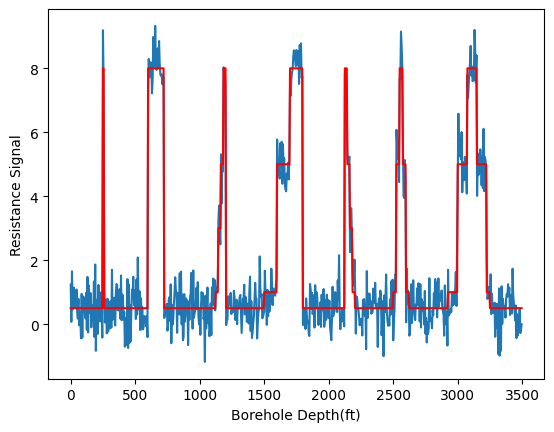

In [15]:
a = np.array(syn1_noise_filter)
a= a[~np.isnan(a)]
# syn3_noise, remainder= signal.deconvolve(syn1_noise_filter,BHA_stab_flag)
syn3_noise = LSQ_deconv(syn1_noise_filter,BHA_stab_flag,1e-1,0.05)
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 
plt.plot(depth_profile_syn,syn3_noise)
plt.plot(depth_profile_syn,borehole_qual_syn,"r")
plt.xlabel("Borehole Depth(ft)")
plt.ylabel("Resistance Signal")

1

(700,)


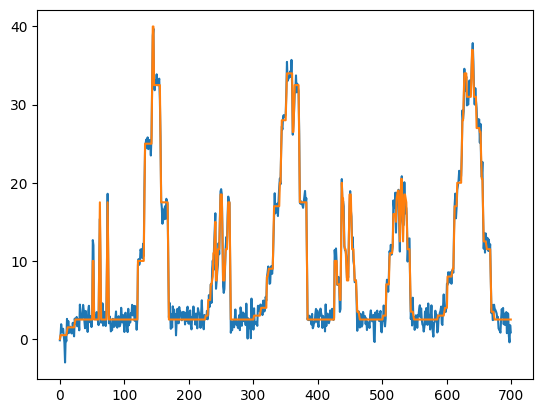

In [19]:
window = 1200
# Adding noise 
noise = np.random.normal(0, 1, syn1.shape)
syn1_noise = syn1
syn1_noise_filter = savgol_filter(syn1_noise,window_length=5,polyorder=3,mode='interp')
# raw_noise = np.mean(abs(syn1)) * np.random.randn(len(syn1))
# raw_noise = np.mean(abs(syn1)) * + (0.5 * np.random.random(len(syn1)))
raw_noise = noise
syn1_noise_filter = syn1 + raw_noise
# syn1_noise_filter = pd.Series(syn1_noise).rolling(window=5,center=True).median()
# syn1_filter = pd.Series(syn1).rolling(window=5,center=True).median()
plt.plot(syn1_noise_filter)
plt.plot(syn1)
print(syn1_noise_filter.shape)

Condition number : inf
Condition number is too large so that a very samll errror can aslo get amplified!


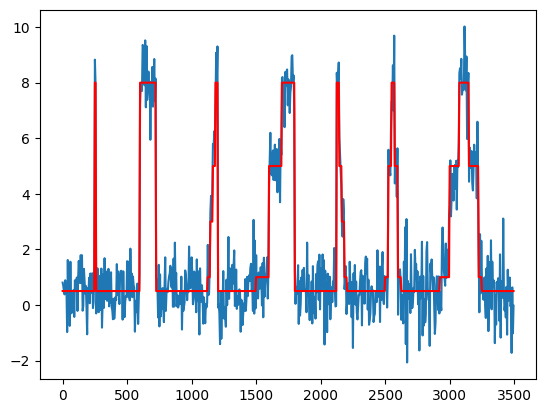

In [20]:
a = np.array(syn1_noise_filter)
a= a[~np.isnan(a)]
# syn3_noise, remainder= signal.deconvolve(syn1_noise_filter,BHA_stab_flag)
syn3_noise = LSQ_deconv(syn1_noise_filter,BHA_stab_flag,1e-1,0.05)
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 
plt.plot(depth_profile_syn,syn3_noise)
plt.plot(depth_profile_syn,borehole_qual_syn,"r")

1.5

(700,)


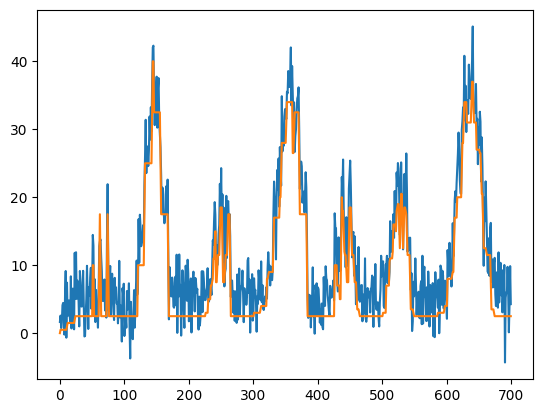

In [39]:
window = 1200
# Adding noise 
noise = np.random.normal(3,3, syn1.shape)
syn1_noise = syn1
syn1_noise_filter = savgol_filter(syn1_noise,window_length=5,polyorder=3,mode='interp')
# raw_noise = np.mean(abs(syn1)) * np.random.randn(len(syn1))
# raw_noise = np.mean(abs(syn1)) * + (0.5 * np.random.random(len(syn1)))
raw_noise = noise
syn1_noise_filter = syn1 + raw_noise
# syn1_noise_filter = pd.Series(syn1_noise).rolling(window=5,center=True).median()
# syn1_filter = pd.Series(syn1).rolling(window=5,center=True).median()
plt.plot(syn1_noise_filter)
plt.plot(syn1)
print(syn1_noise_filter.shape)

Condition number : inf
Condition number is too large so that a very samll errror can aslo get amplified!


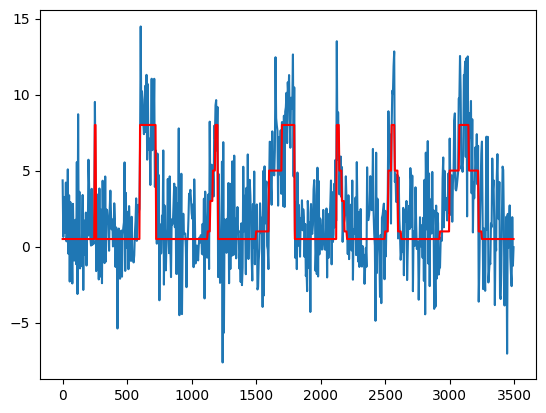

In [40]:
a = np.array(syn1_noise_filter)
a= a[~np.isnan(a)]
# syn3_noise, remainder= signal.deconvolve(syn1_noise_filter,BHA_stab_flag)
syn3_noise = LSQ_deconv(syn1_noise_filter,BHA_stab_flag,1e-1,0.05)
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 
plt.plot(depth_profile_syn,syn3_noise)
plt.plot(depth_profile_syn,borehole_qual_syn,"r")

(700,)


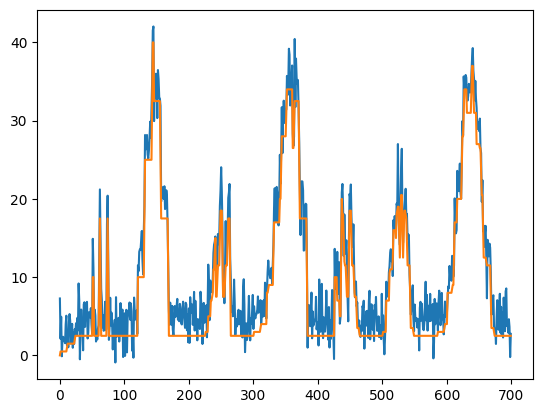

In [43]:
window = 1200
# Adding noise 
noise = np.random.normal(2,2, syn1.shape)
syn1_noise = syn1
syn1_noise_filter = savgol_filter(syn1_noise,window_length=5,polyorder=3,mode='interp')
# raw_noise = np.mean(abs(syn1)) * np.random.randn(len(syn1))
# raw_noise = np.mean(abs(syn1)) * + (0.5 * np.random.random(len(syn1)))
raw_noise = noise
syn1_noise_filter = syn1 + raw_noise
# syn1_noise_filter = pd.Series(syn1_noise).rolling(window=5,center=True).median()
# syn1_filter = pd.Series(syn1).rolling(window=5,center=True).median()
plt.plot(syn1_noise_filter)
plt.plot(syn1)
print(syn1_noise_filter.shape)

Condition number : inf
Condition number is too large so that a very samll errror can aslo get amplified!


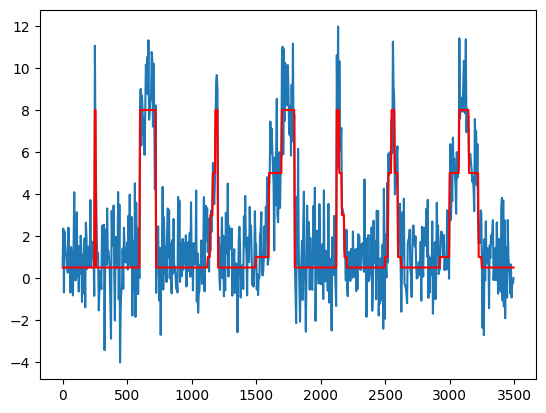

In [44]:
a = np.array(syn1_noise_filter)
a= a[~np.isnan(a)]
# syn3_noise, remainder= signal.deconvolve(syn1_noise_filter,BHA_stab_flag)
syn3_noise = LSQ_deconv(syn1_noise_filter,BHA_stab_flag,1e-1,0.05)
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 
plt.plot(depth_profile_syn,syn3_noise)
plt.plot(depth_profile_syn,borehole_qual_syn,"r")